In [65]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV


In [47]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [48]:
regions = {
    'West': ['Washington', 'Oregon', 'Idaho', 'Montana', 'Wyoming', 'Arizona', 'New Mexico', 'Oklahoma', 'Texas'],
    'Southwest': ['California', 'Nevada', 'Utah', 'Colorado'],
    'Midwest': ['Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota',
                'Missouri', 'Nebraska', 'North Dakota', 'Ohio', 'South Dakota', 'Wisconsin'],
    'South': ['Alabama', 'Arkansas', 'Delaware', 'Florida', 'Georgia', 'Kentucky',
              'Louisiana', 'Maryland', 'Mississippi', 'North Carolina', 'South Carolina',
              'Tennessee', 'Virginia', 'West Virginia'],
    'NewEngland': ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 'New York',
                   'New Jersey', 'Pennsylvania'],
    'Utopia': ['Alaska', 'Hawaii']
}

In [49]:
West_test = test[test['state_name'].isin(regions['West'])]
Southwest_test = test[test['state_name'].isin(regions['Southwest'])]
Midwest_test = test[test['state_name'].isin(regions['Midwest'])]
NewEngland_test = test[test['state_name'].isin(regions['NewEngland'])]
South_test = test[test['state_name'].isin(regions['South'])]
Utopia_test = test[test['state_name'].isin(regions['Utopia'])]

In [50]:
West_train = train[train['state_name'].isin(regions['West'])]
Southwest_train = train[train['state_name'].isin(regions['Southwest'])]
Midwest_train = train[train['state_name'].isin(regions['Midwest'])]
NewEngland_train = train[train['state_name'].isin(regions['NewEngland'])]
South_train = train[train['state_name'].isin(regions['South'])]
Utopia_train = train[train['state_name'].isin(regions['Utopia'])]

In [51]:
Southwest = Southwest[Southwest.columns.drop(list(Southwest.filter(regex='age_')))]

In [52]:
Southwest_test.drop(columns = ['county_fips', 'state_fips', 'state_name', 'county_name', "date"], inplace=True)
Southwest_train.drop(columns = ['county_fips', 'state_fips', 'state_name', 'county_name', "date"], inplace=True)


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_11976/723718911.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Southwest_test.drop(columns = ['county_fips', 'state_fips', 'state_name', 'county_name', "date"], inplace=True)
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_11976/723718911.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Southwest_train.drop(columns = ['county_fips', 'state_fips', 'state_name', 'county_name', "date"], inplace=True)


In [53]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [54]:
X_test = Southwest_test.drop('covid_19_confirmed_cases', axis=1)
y_test = Southwest_test['covid_19_confirmed_cases']

X_train = Southwest_train.drop('covid_19_confirmed_cases', axis=1)
y_train = Southwest_train['covid_19_confirmed_cases']

# XGBoost Sample Model

In [55]:
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [58]:
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [59]:
print('MSE:', mse)
print('R^2:', r2)

MSE: 59208.72976642324
R^2: -0.6419546695040723


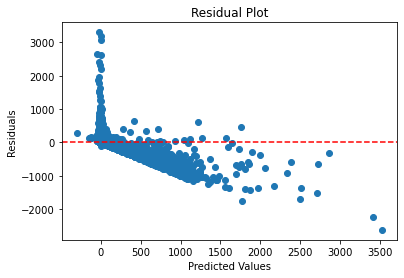

In [60]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(0, color='r', linestyle='--')
plt.title("Residual Plot")
plt.show()

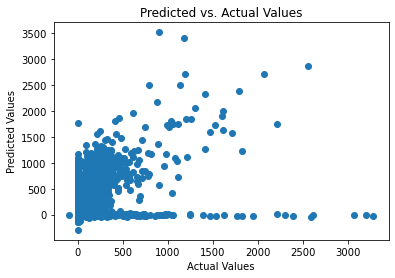

In [62]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual Values")
plt.show()

### Tuning

In [63]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'n_estimators': [100, 200, 300],
}

In [67]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, **best_params)

best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2) Score: {r2}")


Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}
Mean Squared Error: 35454.563195525836
R-squared (R2) Score: 0.016787122037974056


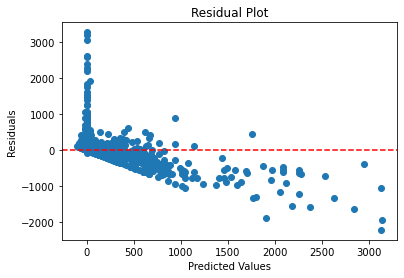

In [68]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(0, color='r', linestyle='--')
plt.title("Residual Plot")
plt.show()

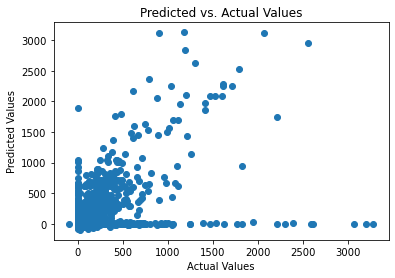

In [69]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual Values")
plt.show()